In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from ase.io import read

from qtpyt.tools import remove_pbc, rotate_couplings
from qtpyt.block_tridiag import graph_partition, greenfunction
from qtpyt.surface.principallayer import PrincipalSelfEnergy
from qtpyt.surface.tools import prepare_leads_matrices
from qtpyt.basis import Basis
import pickle

# from qtpyt.parallel import comm
# from qtpyt.parallel.egrid import GridDesc

In [2]:
pl_path = Path('../../dft/leads/')
cc_path = Path('../../dft/device/')

In [3]:
h_pl_k, s_pl_k = np.load(pl_path / 'hs_pl_k.npy')
h_cc_k, s_cc_k = map(lambda m: m.astype(complex),
                     np.load(cc_path / f'hs_cc_k.npy'))

In [4]:
basis = {'Au': 9, 'H': 5, 'C': 13, 'N': 13}

atoms_pl = read(pl_path / 'leads.xyz')
basis_pl = Basis.from_dictionary(atoms_pl, basis)

atoms_cc = read(cc_path / 'scatt.xyz')
basis_cc = Basis.from_dictionary(atoms_cc, basis)

kpts_t, h_pl_kii, s_pl_kii, h_pl_kij, s_pl_kij = prepare_leads_matrices(
    h_pl_k, s_pl_k, (5, 5, 3), align=(0, h_cc_k[0, 0, 0]))
remove_pbc(basis_cc, h_cc_k)
remove_pbc(basis_cc, s_cc_k)



In [5]:
with open('ase_reference/lead1_hs_lcao.pckl', 'rb') as file:
    H_ase, S_ase = pickle.load(file)


In [16]:
with open('ase_reference/hs_leads_k.pkl', 'rb') as file:
    H_bulk, S_bulk = pickle.load(file)


In [16]:
with open('ase_reference/hs_leads_k.pkl', 'rb') as file:
    H_bulk, S_bulk = pickle.load(file)


In [18]:
kpts_t, h_pl_kii, s_pl_kii, h_pl_kij, s_pl_kij = prepare_leads_matrices(
    H_bulk, S_bulk, (5, 1, 1), align=(0, h_cc_k[0, 0, 0]))
remove_pbc(basis_cc, h_cc_k)
remove_pbc(basis_cc, s_cc_k)

(1, 432, 432)


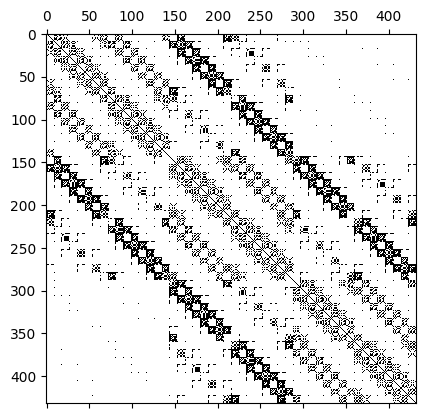

In [19]:
print(h_pl_kii.shape)
plt.imshow(np.real(h_pl_kii[0,:,:]))
plt.spy(np.real(h_pl_kii[0,:,:]),precision=0.1)

In [6]:
print(h_pl_kii.shape)
print(H_ase.shape)

(15, 54, 54)
(864, 864)


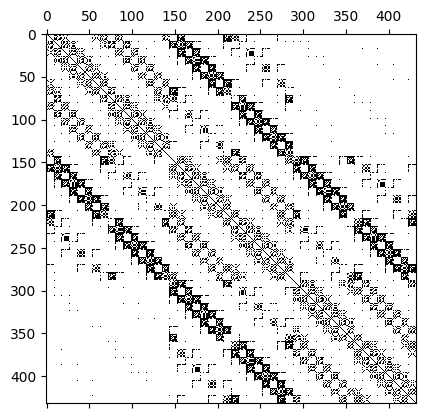

In [20]:
plt.imshow(np.real(H_ase[:432,:432]))
plt.spy(np.real(H_ase[:432,:432]),precision=0.1)

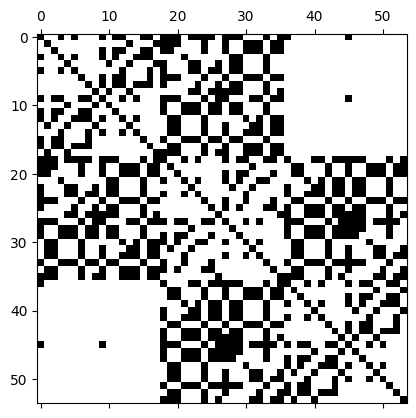

In [13]:
plt.imshow(np.real(h_pl_kii[0,:,:]))
plt.spy(np.real(h_pl_kii[0,:,:]),precision=0.1)